In [1]:
# Dependencies and Setup
import pandas as pd
from datetime import datetime, timedelta

# File to Load (Remember to Change These)
path1 = "input/credit_record.csv"
path2 = "input/application_record.csv"

# Read Purchasing File and store into Pandas data frame
credit_df = pd.read_csv(path1)
application_df = pd.read_csv(path2)

application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [2]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [3]:
credit_df['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [ ]:
credit_df['STATUS'] = credit_df['STATUS'].replace(['5'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['4'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['3'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['2'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['1'], 3)
credit_df['STATUS'] = credit_df['STATUS'].replace(['0'], 2)
credit_df['STATUS'] = credit_df['STATUS'].replace(['X'], 1)
credit_df['STATUS'] = credit_df['STATUS'].replace(['C'], 1)
credit_df['STATUS'] = credit_df['STATUS'].astype(int)

In [4]:
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [5]:
credit_df = credit_df.sort_values(by='STATUS', ascending=False)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
468487,5058263,-18,X
468485,5058263,-16,X
468484,5058263,-15,X
468483,5058263,-14,X


In [6]:
credit_df = credit_df.drop_duplicates(subset='ID', keep="first")
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
468487,5058263,-18,X
468408,5058258,-13,X
468669,5058274,-31,X
468594,5058270,-13,X


In [87]:
credit_df.ID.nunique()

45985

In [7]:
len_credit = len(credit_df.index)
len_application = len(application_df.index)

print(len_credit)
print(len_application)

unique_credit = credit_df['ID'].nunique()
unique_application = application_df['ID'].nunique()

print(unique_credit)
print(unique_application)

45985
438557
45985
438510


In [90]:
credit_card_df = pd.merge(application_df, credit_df, on='ID', how='inner')
credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15,X
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14,X
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-22,X
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4,X
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26,X


In [92]:
application_df.ID.nunique()

438510

In [93]:
credit_df.ID.nunique()

45985

In [91]:
credit_card_df.shape

(36457, 20)

In [94]:
credit_card_df['STATUS'].unique()

array(['X', '0', '1', 'C', '3', '5', '2', '4'], dtype=object)

In [95]:
credit_card_df = credit_card_df[credit_card_df['STATUS'].notna()]

credit_card_df['STATUS'].unique()

len_credit_card = len(credit_card_df.index)

print(len_credit_card)

unique_credit_card = credit_card_df['ID'].nunique()

print(unique_credit_card)

36457
36457


In [96]:
credit_card_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                  object
dtype: object

In [97]:
credit_card_df = credit_card_df[credit_card_df['CNT_CHILDREN'].notna()]
credit_card_df = credit_card_df[credit_card_df['CNT_CHILDREN'].notna()]
credit_card_df['CNT_CHILDREN'] = credit_card_df['CNT_CHILDREN'].astype(int)
credit_card_df['AMT_INCOME_TOTAL'] = credit_card_df['AMT_INCOME_TOTAL'].astype(int)
credit_card_df['FLAG_MOBIL'] = credit_card_df['FLAG_MOBIL'].astype(int)
credit_card_df['FLAG_WORK_PHONE'] = credit_card_df['FLAG_WORK_PHONE'].astype(int)
credit_card_df['FLAG_PHONE'] = credit_card_df['FLAG_PHONE'].astype(int)
credit_card_df['FLAG_EMAIL'] = credit_card_df['FLAG_EMAIL'].astype(int)
credit_card_df['CNT_FAM_MEMBERS'] = credit_card_df['CNT_FAM_MEMBERS'].astype(int)
#credit_card_df['STATUS'] = credit_card_df['STATUS'].astype(int)
credit_card_df['DAYS_BIRTH'] = credit_card_df['DAYS_BIRTH'].astype(int)
credit_card_df['DAYS_EMPLOYED'] = credit_card_df['DAYS_EMPLOYED'].astype(int)

credit_card_df.dtypes

ID                      int64
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int32
AMT_INCOME_TOTAL        int32
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
DAYS_BIRTH              int32
DAYS_EMPLOYED           int32
FLAG_MOBIL              int32
FLAG_WORK_PHONE         int32
FLAG_PHONE              int32
FLAG_EMAIL              int32
OCCUPATION_TYPE        object
CNT_FAM_MEMBERS         int32
MONTHS_BALANCE          int64
STATUS                 object
dtype: object

In [98]:
credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-15,X
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-14,X
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-22,X
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4,X
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26,X


In [99]:
credit_card_df['DAYS_BIRTH'] = abs(credit_card_df['DAYS_BIRTH'])
credit_card_df['DAYS_EMPLOYED'] = abs(credit_card_df['DAYS_EMPLOYED'])

credit_card_df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2,-15,X
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2,-14,X
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2,-22,X
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,-4,X
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,-26,X


In [101]:
unique_gender = credit_card_df['CODE_GENDER'].unique()
print(unique_gender)

unique_flag_car = credit_card_df['FLAG_OWN_CAR'].unique()
print(unique_flag_car)

unique_flag_reality = credit_card_df['FLAG_OWN_REALTY'].unique()
print(unique_flag_reality)

unique_children = credit_card_df['CNT_CHILDREN'].unique()
print(unique_children)

unique_income_type = credit_card_df['NAME_INCOME_TYPE'].unique()
print(unique_income_type)

unique_education = credit_card_df['NAME_EDUCATION_TYPE'].unique()
print(unique_education)

unique_family_status = credit_card_df['NAME_FAMILY_STATUS'].unique()
print(unique_family_status)

unique_housing = credit_card_df['NAME_HOUSING_TYPE'].unique()
print(unique_housing)

unique_occupation = credit_card_df['OCCUPATION_TYPE'].unique()
print(unique_occupation)

unique_status = credit_card_df['STATUS'].unique()
print(unique_status)

['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  3  2  4  5 14 19  7]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
['X' '0' '1' 'C' '3' '5' '2' '4']


In [102]:
income_total = credit_card_df['AMT_INCOME_TOTAL'] / 1000   
    
# Determine outliers using upper and lower bounds
quartiles = income_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"IQR is {iqr}")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

IQR is 103.5
Values below -33.75 could be outliers
Values above 380.25 could be outliers


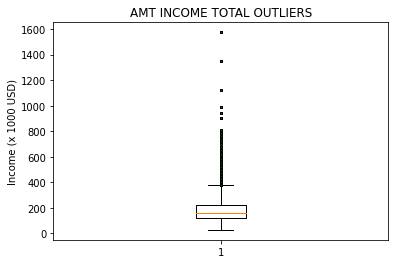

In [103]:
import matplotlib.pyplot as plt
flierprops = dict(marker='o', markerfacecolor='green', markersize=2, linestyle='none')

fig, ax = plt.subplots()
ax.set_title("AMT INCOME TOTAL OUTLIERS")
ax.set_ylabel("Income (x 1000 USD)")
ax.boxplot(income_total, flierprops=flierprops)
plt.show()

<AxesSubplot:>

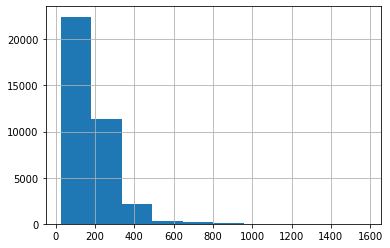

In [104]:
income_total.hist(bins=10)

In [107]:
minincome = income_total.min()
maxincome = income_total.max()

print(minincome)
print(maxincome)

27.0
1575.0


In [108]:
children_total = credit_card_df['CNT_CHILDREN']
    
# Determine outliers using upper and lower bounds
quartiles = children_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"IQR is {iqr}")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

IQR is 1.0
Values below -1.5 could be outliers
Values above 2.5 could be outliers


In [109]:
family_total = credit_card_df['CNT_FAM_MEMBERS']
    
# Determine outliers using upper and lower bounds
quartiles = family_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"IQR is {iqr}")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

IQR is 1.0
Values below 0.5 could be outliers
Values above 4.5 could be outliers


<AxesSubplot:>

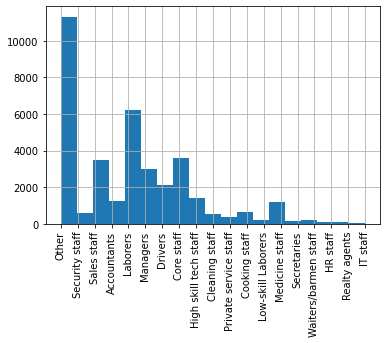

In [110]:
occupation_other = credit_card_df
occupation_other["OCCUPATION_TYPE"].fillna("Other", inplace = True)

occupation = occupation_other['OCCUPATION_TYPE']

occupation.hist(xrot=90, bins=19)

In [111]:
credit_card_df = credit_card_df.drop(['MONTHS_BALANCE'], axis=1)
credit_card_df = credit_card_df.drop(['OCCUPATION_TYPE'], axis=1)

credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,X
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,X
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,2,X
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1,X
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1,X


In [112]:
credit_card_df.to_csv ('cc_dataset.csv', index = False, header=True)

In [113]:
cc_outliers_df = credit_card_df[credit_card_df['AMT_INCOME_TOTAL'] < 380250] 
cc_outliers_df = credit_card_df[credit_card_df['CNT_CHILDREN'] < 2.5] 
cc_outliers_df = credit_card_df[credit_card_df['CNT_FAM_MEMBERS'] > 0.5] 
cc_outliers_df = credit_card_df[credit_card_df['CNT_FAM_MEMBERS'] < 4.5] 

cc_outliers_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,X
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,X
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,2,X
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1,X
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1,X


In [114]:
len_cc_outliers = len(cc_outliers_df.index)

print(len_cc_outliers)

unique_children = cc_outliers_df['CNT_CHILDREN'].unique()
print(unique_children)

unique_fam = cc_outliers_df['CNT_FAM_MEMBERS'].unique()
print(unique_fam)

35977
[0 1 2 3]
[2 1 3 4]


<AxesSubplot:>

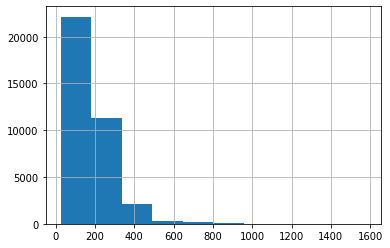

In [115]:
income_total_outliers = cc_outliers_df['AMT_INCOME_TOTAL'] / 1000   

income_total_outliers.hist(bins=10)

In [116]:
ot = pd.DataFrame(cc_outliers_df.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type

1             CODE_GENDER
2            FLAG_OWN_CAR
3         FLAG_OWN_REALTY
6        NAME_INCOME_TYPE
7     NAME_EDUCATION_TYPE
8      NAME_FAMILY_STATUS
9       NAME_HOUSING_TYPE
17                 STATUS
Name: index, dtype: object

In [117]:
num_type = pd.DataFrame(cc_outliers_df.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']

In [118]:
a = cc_outliers_df[object_type]['CODE_GENDER'].value_counts()
b = cc_outliers_df[object_type]['FLAG_OWN_CAR'].value_counts()
c = cc_outliers_df[object_type]['FLAG_OWN_REALTY'].value_counts()
d = cc_outliers_df[object_type]['NAME_INCOME_TYPE'].value_counts()
e = cc_outliers_df[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = cc_outliers_df[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = cc_outliers_df[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

F    24139
M    11838
Name: CODE_GENDER, dtype: int64 
 N    22376
Y    13601
Name: FLAG_OWN_CAR, dtype: int64 
 Y    24154
N    11823
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 18486
Commercial associate     8397
Pensioner                6141
State servant            2942
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    24421
Higher education                  9766
Incomplete higher                 1385
Lower secondary                    373
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 24600
Single / not married     4828
Civil marriage           2924
Separated                2093
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      32104
With parents            1759
Municipal apartment     1120
Rented apartment         575
Office apartment         260
Co-op apartment          159
Name: NAME_HOUSING_TYPE, dtype: int6

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in cc_outliers_df:
    if cc_outliers_df[x].dtypes=='object':
        cc_outliers_df[x] = le.fit_transform(cc_outliers_df[x])

<ipython-input-119-c34cca52af73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_outliers_df[x] = le.fit_transform(cc_outliers_df[x])


In [120]:
cc_outliers_df.to_csv ('cc_outliers_dataset.csv', index = False, header=True)

In [121]:
cc_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35977 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   35977 non-null  int64
 1   CODE_GENDER          35977 non-null  int32
 2   FLAG_OWN_CAR         35977 non-null  int32
 3   FLAG_OWN_REALTY      35977 non-null  int32
 4   CNT_CHILDREN         35977 non-null  int32
 5   AMT_INCOME_TOTAL     35977 non-null  int32
 6   NAME_INCOME_TYPE     35977 non-null  int32
 7   NAME_EDUCATION_TYPE  35977 non-null  int32
 8   NAME_FAMILY_STATUS   35977 non-null  int32
 9   NAME_HOUSING_TYPE    35977 non-null  int32
 10  DAYS_BIRTH           35977 non-null  int32
 11  DAYS_EMPLOYED        35977 non-null  int32
 12  FLAG_MOBIL           35977 non-null  int32
 13  FLAG_WORK_PHONE      35977 non-null  int32
 14  FLAG_PHONE           35977 non-null  int32
 15  FLAG_EMAIL           35977 non-null  int32
 16  CNT_FAM_MEMBERS      3

In [122]:
cc_outliers_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,7
1,5008805,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,7
2,5008806,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2,7
3,5008808,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,7
4,5008809,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,7


7    19395
6    11607
0     4220
1      650
2       48
5       46
3        8
4        3
Name: STATUS, dtype: int64

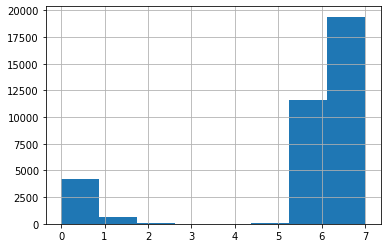

In [123]:
status_outliers = cc_outliers_df['STATUS']
status_outliers.hist(bins=8)
status_outliers.value_counts()

In [124]:
cc_outliers_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,7
1,5008805,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,7
2,5008806,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2,7
3,5008808,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,7
4,5008809,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,7


In [125]:
cc_outliers_df.STATUS.value_counts()

7    19395
6    11607
0     4220
1      650
2       48
5       46
3        8
4        3
Name: STATUS, dtype: int64

In [126]:
cc_outliers_df.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
count,3.597700e+04,35977.000000,35977.000000,35977.000000,35977.000000,3.597700e+04,35977.000000,35977.000000,35977.000000,35977.000000,35977.000000,35977.000000,35977.0,35977.000000,35977.000000,35977.000000,35977.000000,35977.000000
mean,5.078185e+06,0.329044,0.378047,0.671373,0.391584,1.867507e+05,2.390472,3.094727,1.373044,1.284682,16008.672096,64378.084359,1.0,0.225227,0.295522,0.089752,2.156934,5.737527
std,4.190312e+04,0.469872,0.484906,0.469720,0.651100,1.017746e+05,1.734221,1.342452,0.959347,0.953708,4213.067074,136300.730321,0.0,0.417738,0.456283,0.285830,0.832710,2.273693
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,7489.000000,17.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.042022e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,12478.000000,1169.000000,1.0,0.000000,0.000000,0.000000,2.000000,6.000000
50%,5.074532e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,15646.000000,2531.000000,1.0,0.000000,0.000000,0.000000,2.000000,7.000000
75%,5.114653e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,19484.000000,5762.000000,1.0,0.000000,1.000000,0.000000,3.000000,7.000000
max,5.150487e+06,1.000000,1.000000,1.000000,3.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,25152.000000,365243.000000,1.0,1.000000,1.000000,1.000000,4.000000,7.000000


## Clustering Kmeans

In [127]:
df_cluster = cc_outliers_df.drop(["ID"], axis=1)

In [128]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(df_cluster)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(df_cluster)

In [129]:
predicted_clusters

array([2, 2, 0, ..., 0, 2, 0])

In [130]:
df_cluster["P_CLUSTERS"]=predicted_clusters

In [131]:
df_cluster[["P_CLUSTERS", "STATUS"]].head()

,P_CLUSTERS,STATUS
0,2,7
1,2,7
2,0,7
3,2,7
4,2,7


In [132]:
df_cluster["P_CLUSTERS"].value_counts()

0    23923
1     6108
2     5946
Name: P_CLUSTERS, dtype: int64

In [133]:
df_cluster["STATUS"].value_counts()

7    19395
6    11607
0     4220
1      650
2       48
5       46
3        8
4        3
Name: STATUS, dtype: int64

In [135]:
df_cluster.describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,P_CLUSTERS
count,35977.000000,35977.000000,35977.000000,35977.000000,3.597700e+04,35977.000000,35977.000000,35977.000000,35977.000000,35977.000000,35977.000000,35977.0,35977.000000,35977.000000,35977.000000,35977.000000,35977.000000,35977.000000
mean,0.329044,0.378047,0.671373,0.391584,1.867507e+05,2.390472,3.094727,1.373044,1.284682,16008.672096,64378.084359,1.0,0.225227,0.295522,0.089752,2.156934,5.737527,0.500320
std,0.469872,0.484906,0.469720,0.651100,1.017746e+05,1.734221,1.342452,0.959347,0.953708,4213.067074,136300.730321,0.0,0.417738,0.456283,0.285830,0.832710,2.273693,0.761945
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,7489.000000,17.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,12478.000000,1169.000000,1.0,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,15646.000000,2531.000000,1.0,0.000000,0.000000,0.000000,2.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,19484.000000,5762.000000,1.0,0.000000,1.000000,0.000000,3.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,3.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,25152.000000,365243.000000,1.0,1.000000,1.000000,1.000000,4.000000,7.000000,2.000000


## Downsampling

In [136]:
df_clus_majority = df_cluster[df_cluster.P_CLUSTERS==0]
df_clus_majority.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,P_CLUSTERS
2,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2,7,0
12,1,1,1,0,135000,0,4,1,1,17778,1194,1,0,0,0,2,7,0
13,1,1,1,0,135000,0,4,1,1,17778,1194,1,0,0,0,2,7,0
14,1,1,1,0,135000,0,4,1,1,17778,1194,1,0,0,0,2,7,0
15,1,1,1,0,135000,0,4,1,1,17778,1194,1,0,0,0,2,7,0


In [137]:
df_clus_minority = df_cluster[df_cluster.P_CLUSTERS!=0]
df_clus_minority.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,P_CLUSTERS
0,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,7,2
1,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,7,2
3,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,7,2
4,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,7,2
5,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,7,2


In [138]:
df_clus_minority.P_CLUSTERS.unique()

array([2, 1])

In [139]:
df_clus_minority.P_CLUSTERS.count()

12054

In [142]:
from sklearn.utils import resample

In [143]:
df_clus_majority_downsampled = resample(df_clus_majority,
                                  replace=False,
                                  n_samples=6000,
                                  random_state=123)

In [144]:
df_clus_majority_downsampled.count()

CODE_GENDER            6000
FLAG_OWN_CAR           6000
FLAG_OWN_REALTY        6000
CNT_CHILDREN           6000
AMT_INCOME_TOTAL       6000
NAME_INCOME_TYPE       6000
NAME_EDUCATION_TYPE    6000
NAME_FAMILY_STATUS     6000
NAME_HOUSING_TYPE      6000
DAYS_BIRTH             6000
DAYS_EMPLOYED          6000
FLAG_MOBIL             6000
FLAG_WORK_PHONE        6000
FLAG_PHONE             6000
FLAG_EMAIL             6000
CNT_FAM_MEMBERS        6000
STATUS                 6000
P_CLUSTERS             6000
dtype: int64

In [145]:
df_cluster_downsampled = pd.concat([df_clus_majority_downsampled, df_clus_minority])

In [146]:
df_cluster_downsampled.P_CLUSTERS.value_counts()

1    6108
0    6000
2    5946
Name: P_CLUSTERS, dtype: int64

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
target = df_cluster_downsampled.P_CLUSTERS
target_names = df_cluster_downsampled.P_CLUSTERS.unique()
target.head()

5001     0
35153    0
26099    0
32890    0
22690    0
Name: P_CLUSTERS, dtype: int32

In [149]:
target_names

array([0, 2, 1])

In [150]:
data = df_cluster_downsampled.drop(["P_CLUSTERS"], axis=1)
feature_names = data.columns
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
5001,0,1,1,0,180000,0,2,1,1,17211,3076,1,0,0,1,2,0
35153,0,0,1,0,225000,4,4,1,1,17375,3759,1,0,0,0,2,7
26099,1,0,0,1,135000,0,4,1,1,11296,727,1,1,1,0,3,6
32890,0,1,1,1,90000,0,4,1,1,14770,219,1,1,0,0,3,7
22690,0,0,0,0,117000,4,4,1,1,20754,2330,1,0,0,0,2,7


In [151]:
print(target.shape, data.shape)

(18054,) (18054, 17)


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [153]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
24036,0,0,0,0,117000,1,4,1,1,23283,365243,1,0,1,0,2,7
34186,0,0,1,0,90000,1,4,3,1,23262,365243,1,0,1,0,1,6
13739,1,1,0,2,427500,0,1,1,1,14561,4745,1,0,1,0,4,6
16678,1,1,1,0,180000,4,1,1,5,11089,1467,1,0,0,0,2,7
3949,0,0,1,0,211500,1,4,1,1,22099,365243,1,0,1,0,2,7


In [154]:
y_train.value_counts()

1    4622
0    4500
2    4418
Name: P_CLUSTERS, dtype: int64

In [155]:
y_test.value_counts()

2    1528
0    1500
1    1486
Name: P_CLUSTERS, dtype: int64

In [156]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [157]:
import matplotlib.pyplot as plt

## KNN

k:1, Train/Test Score: 1.000/0.936
k:3, Train/Test Score: 0.955/0.912
k:5, Train/Test Score: 0.928/0.885
k:7, Train/Test Score: 0.907/0.862
k:9, Train/Test Score: 0.892/0.856
k:11, Train/Test Score: 0.879/0.852
k:13, Train/Test Score: 0.871/0.840
k:15, Train/Test Score: 0.864/0.840
k:17, Train/Test Score: 0.853/0.828
k:19, Train/Test Score: 0.848/0.826
k:21, Train/Test Score: 0.847/0.821
k:23, Train/Test Score: 0.843/0.823
k:25, Train/Test Score: 0.841/0.826
k:27, Train/Test Score: 0.838/0.823
k:29, Train/Test Score: 0.832/0.816


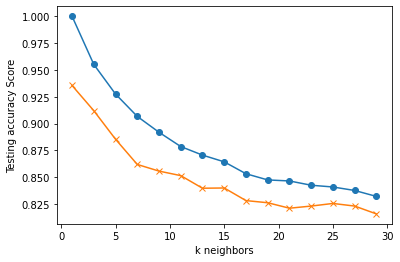

In [160]:
train_scores = []
test_scores = []
for k in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k:{k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [165]:
print(knn.score(X_test_scaled,y_test))

0.8159060700044306


In [166]:
from sklearn.metrics import classification_report
prediction = knn.predict(X_test_scaled)
print(classification_report(prediction, y_test, target_names))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1445
           2       0.74      0.72      0.73      1579
           1       1.00      1.00      1.00      1490

    accuracy                           0.82      4514
   macro avg       0.82      0.82      0.82      4514
weighted avg       0.82      0.82      0.82      4514



c:\users\rodrigo lozano\.conda\envs\neuralenv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0 2 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
rf = RandomForestClassifier(n_estimators=1)
rf.fit(X_train_scaled, y_train)
print(rf.score(X_test_scaled, y_test), rf.score(X_train_scaled, y_train))

0.9997784669915818 1.0


In [ ]:
rfc = RandomForestClassifier(n_estimators=200).fit(X_train_scaled, y_train)
rfc_pred = rfc.predict(X_test_scaled)

In [ ]:
prediction = rf.predict(X_test_scaled)
print(classification_report(prediction, y_test, target_names))

In [ ]:
accuracy_score(y_test, rfc_pred)
f1_score(y_test, rfc_pred)
recall_score(y_test, rfc_pred)

## Decision Tree

In [170]:
from sklearn import tree

In [171]:
clf = tree.DecisionTreeClassifier()

In [172]:
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9997784669915818

## NN

In [173]:
from tensorflow.keras.utils import to_categorical

In [174]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [215]:
from tensorflow.keras.models import Sequential

model5 = Sequential()

In [216]:
feat = X_train_scaled.shape[1]

In [217]:
from tensorflow.keras.layers import Dense
number_inputs = 17
number_hidden_nodes = 2
model5.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [218]:
number_classes = 3
model5.add(Dense(units=number_classes, activation='softmax'))

In [219]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 9         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [220]:
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [221]:
model5.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=15,
    shuffle=True,
    verbose=2
)

Epoch 1/15
424/424 - 0s - loss: 0.9293 - accuracy: 0.5361
Epoch 2/15
424/424 - 0s - loss: 0.6138 - accuracy: 0.6805
Epoch 3/15
424/424 - 0s - loss: 0.5141 - accuracy: 0.7098
Epoch 4/15
424/424 - 0s - loss: 0.4814 - accuracy: 0.7283
Epoch 5/15
424/424 - 0s - loss: 0.4640 - accuracy: 0.7480
Epoch 6/15
424/424 - 0s - loss: 0.4487 - accuracy: 0.7700
Epoch 7/15
424/424 - 0s - loss: 0.4281 - accuracy: 0.8015
Epoch 8/15
424/424 - 0s - loss: 0.3964 - accuracy: 0.8328
Epoch 9/15
424/424 - 0s - loss: 0.3582 - accuracy: 0.8600
Epoch 10/15
424/424 - 0s - loss: 0.3216 - accuracy: 0.8810
Epoch 11/15
424/424 - 0s - loss: 0.2883 - accuracy: 0.9030
Epoch 12/15
424/424 - 0s - loss: 0.2595 - accuracy: 0.9199
Epoch 13/15
424/424 - 0s - loss: 0.2346 - accuracy: 0.9363
Epoch 14/15
424/424 - 0s - loss: 0.2131 - accuracy: 0.9436
Epoch 15/15
424/424 - 0s - loss: 0.1943 - accuracy: 0.9539


In [222]:
model5_loss, model5_accuracy = model5.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model5_loss}, Accuracy: {model5_accuracy}")

142/142 - 0s - loss: 0.1854 - accuracy: 0.9637
Loss: 0.18542909622192383, Accuracy: 0.9636685848236084


In [226]:
model5.save("../models/Normal_Neural_Network_V2.h5")